In [1]:
#flagged for one-hot encoding: DOMAIN; INCOME; GENDER; WEALTH; WEALTH2; GEOCODE2

In [2]:
#NOTE: RFA's subject to one-hot encoding but with caveat of not being optimal

In [3]:
#CHILD03 	CHILD07 	CHILD12 	CHILD18 	NUMCHLD

In [4]:
#ADATE_2 	ADATE_3 	ADATE_4 	ADATE_5 	ADATE_6 	ADATE_7 	ADATE_8 	ADATE_9 	ADATE_10 	ADATE_11 	ADATE_12 	ADATE_13 	ADATE_14 	ADATE_15 	ADATE_16 	ADATE_17 	ADATE_18 	ADATE_19 	ADATE_20 	ADATE_21 	ADATE_22 	ADATE_23 	ADATE_24 	RFA_2 	RFA_3 	RFA_4 	RFA_5 	RFA_6 	RFA_7 	RFA_8 	RFA_9 	RFA_10 	RFA_11 	RFA_12 	RFA_13 	RFA_14 	RFA_15 	RFA_16 	RFA_17 	RFA_18 	RFA_19 	RFA_20 	RFA_21 	RFA_22 	RFA_23 	RFA_24

In [5]:
#Loading libraries
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score # New
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [6]:
data = pd.read_csv('donors.csv')
print(data.shape)
pd.options.display.max_columns = 476
data

(95412, 476)


,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [7]:
list(data.columns)

['Unnamed: 0',
 'ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'E

In [8]:
data.describe(include="all")

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412.000000,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,

In [9]:
data.duplicated().sum()

0

In [10]:
null_values = pd.DataFrame(round((data.isna().sum()/len(data))*100,2))
null_values.rename(columns={0:'% of Null Values'}, inplace=True)
pd.options.display.max_rows = 476
null_values

,% of Null Values
Unnamed: 0,0.00
ODATEDW,0.00
OSOURCE,0.00
TCODE,0.00
STATE,0.00
ZIP,0.00
MAILCODE,0.00
PVASTATE,0.00
DOB,25.03
NOEXCH,0.00


In [11]:
prov_data = data.copy() 

In [12]:
prov_data["ZIP"] = prov_data["ZIP"].str.replace("-", "")
prov_data["ZIP"] = prov_data["ZIP"].astype(int) 

In [13]:
#prov_data = prov_data.drop(prov_data[prov_data["MAILCODE"]=="B"].index)

In [14]:
#prov_data = prov_data.drop(columns={"Unnamed: 0","MAILCODE","TCODE","NOEXCH","PVASTATE","MDMAUD","SOLP3","SOLIH","GEOCODE"})

In [15]:
prov_data["ODATEDW"] = pd.to_datetime(prov_data["ODATEDW"])

In [16]:
prov_data["DOB"] =  pd.to_datetime(prov_data["DOB"])

In [17]:
prov_data["RECINHSE"].replace("X",1,inplace=True)
prov_data["RECINHSE"].replace(" ",0,inplace=True)

In [18]:
prov_data["RECP3"].replace("X",1,inplace=True)
prov_data["RECP3"].replace(" ",0,inplace=True)

In [19]:
prov_data["RECPGVG"].replace("X",1,inplace=True)
prov_data["RECPGVG"].replace(" ",0,inplace=True)

In [20]:
prov_data["RECSWEEP"].replace("X",1,inplace=True)
prov_data["RECSWEEP"].replace(" ",0,inplace=True)

In [21]:
prov_data["DOMAIN"].replace(" ",np.nan,inplace=True)

In [22]:
prov_data["HOMEOWNR"].replace(" ",0,inplace=True)
prov_data["HOMEOWNR"].replace("H",1,inplace=True)
prov_data["HOMEOWNR"].replace("U",1,inplace=True)#acts as mode filling
prov_data["HOMEOWNR"].astype(int)

0        0
1        1
2        1
3        1
4        1
        ..
95407    0
95408    1
95409    0
95410    1
95411    1
Name: HOMEOWNR, Length: 95412, dtype: int32

In [23]:
prov_data['NUMCHLD'].fillna(0,inplace=True)
prov_data['NUMCHLD'].astype(int)

0        0
1        1
2        0
3        0
4        1
        ..
95407    0
95408    1
95409    0
95410    0
95411    0
Name: NUMCHLD, Length: 95412, dtype: int32

In [24]:
prov_data["DATASRCE"].replace(" ",np.nan,inplace=True)

In [25]:
prov_data["MAJOR"].replace(" ",0,inplace=True)
prov_data["MAJOR"].replace("X",1,inplace=True)

In [26]:
prov_data["COLLECT1"].replace(" ",0,inplace=True)
prov_data["COLLECT1"].replace("Y",1,inplace=True)
prov_data["VETERANS"].replace(" ",0,inplace=True)
prov_data["VETERANS"].replace("Y",1,inplace=True)
prov_data["BIBLE"].replace(" ",0,inplace=True)
prov_data["BIBLE"].replace("Y",1,inplace=True)
prov_data["CATLG"].replace(" ",0,inplace=True)
prov_data["CATLG"].replace("Y",1,inplace=True)
prov_data["HOMEE"].replace(" ",0,inplace=True)
prov_data["HOMEE"].replace("Y",1,inplace=True)
prov_data["PETS"].replace(" ",0,inplace=True)
prov_data["PETS"].replace("Y",1,inplace=True)
prov_data["CDPLAY"].replace(" ",0,inplace=True)
prov_data["CDPLAY"].replace("Y",1,inplace=True)
prov_data["STEREO"].replace(" ",0,inplace=True)
prov_data["STEREO"].replace("Y",1,inplace=True)
prov_data["PCOWNERS"].replace(" ",0,inplace=True)
prov_data["PCOWNERS"].replace("Y",1,inplace=True)
prov_data["PHOTO"].replace(" ",0,inplace=True)
prov_data["PHOTO"].replace("Y",1,inplace=True)
prov_data["CRAFTS"].replace(" ",0,inplace=True)
prov_data["CRAFTS"].replace("Y",1,inplace=True)
prov_data["FISHER"].replace(" ",0,inplace=True)
prov_data["FISHER"].replace("Y",1,inplace=True)
prov_data["GARDENIN"].replace(" ",0,inplace=True)
prov_data["GARDENIN"].replace("Y",1,inplace=True)
prov_data["BOATS"].replace(" ",0,inplace=True)
prov_data["BOATS"].replace("Y",1,inplace=True)
prov_data["WALKER"].replace(" ",0,inplace=True)
prov_data["WALKER"].replace("Y",1,inplace=True)
prov_data["KIDSTUFF"].replace(" ",0,inplace=True)
prov_data["KIDSTUFF"].replace("Y",1,inplace=True)
prov_data["CARDS"].replace(" ",0,inplace=True)
prov_data["CARDS"].replace("Y",1,inplace=True)
prov_data["PLATES"].replace(" ",0,inplace=True)
prov_data["PLATES"].replace("Y",1,inplace=True)

In [27]:
prov_data["LIFESRC"].replace(" ",np.nan,inplace=True)

In [28]:
prov_data["PEPSTRFL"].replace(" ",0,inplace=True)
prov_data["PEPSTRFL"].replace("X",1,inplace=True)

In [29]:
prov_data.loc[:,"MALEMILI":"FEDGOV"] = prov_data.loc[:,"MALEMILI":"FEDGOV"]/100 

In [30]:
prov_data.loc[:,"POP90C1":"ETH16"] = prov_data.loc[:,"POP90C1":"ETH16"]/100

In [31]:
prov_data.loc[:,"AGE907":"MARR4"] = prov_data.loc[:,"AGE907":"MARR4"]/100   

In [32]:
prov_data.loc[:,"DW1":"DW9"] = prov_data.loc[:,"DW1":"DW9"]/100 

In [33]:
prov_data.loc[:,"HU1":"HUR2"] = prov_data.loc[:,"HU1":"HUR2"]/100 

In [34]:
prov_data.loc[:,"HUPA1":"RP4"] = prov_data.loc[:,"HUPA1":"RP4"]/100 

In [35]:
prov_data.loc[:,"IC6":"PEC2"] = prov_data.loc[:,"IC6":"PEC2"]/100 

In [36]:
prov_data.loc[:,"TPE12":"OEDC7"] = prov_data.loc[:,"TPE12":"OEDC7"]/100 

In [37]:
prov_data.loc[:,"EC2":"HC21"] = prov_data.loc[:,"EC2":"HC21"]/100 

In [38]:
prov_data.loc[:,"AC1":"AC2"] = prov_data.loc[:,"AC1":"AC2"]/100 

In [39]:
prov_data["ADATE_2"] = pd.to_datetime(prov_data["ADATE_2"])
prov_data["ADATE_3"] = pd.to_datetime(prov_data["ADATE_3"])
prov_data["ADATE_4"] = pd.to_datetime(prov_data["ADATE_4"])
prov_data["ADATE_5"] = pd.to_datetime(prov_data["ADATE_5"])
prov_data["ADATE_6"] = pd.to_datetime(prov_data["ADATE_6"])
prov_data["ADATE_7"] = pd.to_datetime(prov_data["ADATE_7"])
prov_data["ADATE_8"] = pd.to_datetime(prov_data["ADATE_8"])
prov_data["ADATE_9"] = pd.to_datetime(prov_data["ADATE_9"])
prov_data["ADATE_10"] = pd.to_datetime(prov_data["ADATE_10"])
prov_data["ADATE_11"] = pd.to_datetime(prov_data["ADATE_11"])
prov_data["ADATE_12"] = pd.to_datetime(prov_data["ADATE_12"])
prov_data["ADATE_13"] = pd.to_datetime(prov_data["ADATE_13"])
prov_data["ADATE_14"] = pd.to_datetime(prov_data["ADATE_14"])
prov_data["ADATE_15"] = pd.to_datetime(prov_data["ADATE_15"])
prov_data["ADATE_16"] = pd.to_datetime(prov_data["ADATE_16"])
prov_data["ADATE_17"] = pd.to_datetime(prov_data["ADATE_17"])
prov_data["ADATE_18"] = pd.to_datetime(prov_data["ADATE_18"])
prov_data["ADATE_19"] = pd.to_datetime(prov_data["ADATE_19"])
prov_data["ADATE_20"] = pd.to_datetime(prov_data["ADATE_20"])
prov_data["ADATE_21"] = pd.to_datetime(prov_data["ADATE_21"])
prov_data["ADATE_22"] = pd.to_datetime(prov_data["ADATE_22"])
prov_data["ADATE_23"] = pd.to_datetime(prov_data["ADATE_23"])
prov_data["ADATE_24"] = pd.to_datetime(prov_data["ADATE_24"])

In [40]:
prov_data["MAXADATE"] = pd.to_datetime(prov_data["MAXADATE"])

In [41]:
prov_data["RDATE_3"] = pd.to_datetime(prov_data["RDATE_3"])
prov_data["RDATE_4"] = pd.to_datetime(prov_data["RDATE_4"])
prov_data["RDATE_5"] = pd.to_datetime(prov_data["RDATE_5"])
prov_data["RDATE_6"] = pd.to_datetime(prov_data["RDATE_6"])
prov_data["RDATE_7"] = pd.to_datetime(prov_data["RDATE_7"])
prov_data["RDATE_8"] = pd.to_datetime(prov_data["RDATE_8"])
prov_data["RDATE_9"] = pd.to_datetime(prov_data["RDATE_9"])
prov_data["RDATE_10"] = pd.to_datetime(prov_data["RDATE_10"])
prov_data["RDATE_11"] = pd.to_datetime(prov_data["RDATE_11"])
prov_data["RDATE_12"] = pd.to_datetime(prov_data["RDATE_12"])
prov_data["RDATE_13"] = pd.to_datetime(prov_data["RDATE_13"])
prov_data["RDATE_14"] = pd.to_datetime(prov_data["RDATE_14"])
prov_data["RDATE_15"] = pd.to_datetime(prov_data["RDATE_15"])
prov_data["RDATE_16"] = pd.to_datetime(prov_data["RDATE_16"])
prov_data["RDATE_17"] = pd.to_datetime(prov_data["RDATE_17"])
prov_data["RDATE_18"] = pd.to_datetime(prov_data["RDATE_18"])
prov_data["RDATE_19"] = pd.to_datetime(prov_data["RDATE_19"])
prov_data["RDATE_20"] = pd.to_datetime(prov_data["RDATE_20"])
prov_data["RDATE_21"] = pd.to_datetime(prov_data["RDATE_21"])
prov_data["RDATE_22"] = pd.to_datetime(prov_data["RDATE_22"])
prov_data["RDATE_23"] = pd.to_datetime(prov_data["RDATE_23"])
prov_data["RDATE_24"] = pd.to_datetime(prov_data["RDATE_24"])

In [42]:
prov_data["MINRDATE"] = pd.to_datetime(prov_data["MINRDATE"])

In [43]:
prov_data["MAXRDATE"] = pd.to_datetime(prov_data["MAXRDATE"])

In [44]:
prov_data["LASTDATE"] = pd.to_datetime(prov_data["LASTDATE"])
prov_data["FISTDATE"] = pd.to_datetime(prov_data["FISTDATE"])
prov_data["NEXTDATE"] = pd.to_datetime(prov_data["NEXTDATE"])

In [45]:
#prov_data = prov_data.drop(columns=data.loc[:,"ADATE_2":"RFA_24"].columns)

In [46]:
#prov_data = prov_data.drop(columns=data.loc[:,"RDATE_3":"RAMNT_24"].columns)

In [47]:
prov_data.reset_index(drop=True,inplace=True)

In [48]:
prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LASTDATE"]-prov_data["ODATEDW"]

In [49]:
prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LIFETIME_OF_DONOR_DATA"].dt.days

In [50]:
#prov_data = prov_data.drop(columns="ODATEDW")

In [51]:
#prov_data = prov_data.set_index("CONTROLN")

In [52]:
prov_data

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,...,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,LIFETIME_OF_DONOR_DATA
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,0,0,0,0,XXXX,T2,0,,,,,0.0,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.39,0.34,0.18,0.10,0.02,0.01,,,0,5.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,992,264,332,0.00,0.35,0.65,0.47,0.53,0.92,0.01,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.11,0.00,0.00,0.00,39,48,51,40,50,54,0.25,0.31,0.42,0.27,0.11,0.14,0.18,0.17,0.13,0.11,0.15,0.12,0.11,0.34,0.25,0.18,0.26,0.10,0.23,0.18,0.33,0.49,0.28,0.12,0.04,0.61,0.07,0.12,0.19,198,276,0.97,0.95,0.02,0.02,0.00,0.00,0.07,0.07,0.00,479,635,3,2,0.86,0.14,0.96,0.04,0.07,0.38,0.80,0.70,0.32,0.84,0.16,0.06,0.02,0.05,0.09,0.15,0.03,0.17,0.50,0.25,0.00,0.00,0.00,0.02,0.07,0.13,0.27,0.47,0.00,0.01,0.61,58,61,15,4,0.02,0.00,0.00,0.14,0.01,0.00,0.00,0.02,0.05,0.17,0.73,0.0,177.0,682.0,307,318,349,378,12883,0.13,0.23,0.23,0.23,0.15,0.01,0.00,0.00,0.01,0.04,0.25,0.24,0.26,0.17,0.02,0.00,0.00,0.02,0.28,0.04,0.51,0.01,0.46,0.54,0.03,0

In [53]:
prov_data.dtypes

Unnamed: 0                         int64
ODATEDW                   datetime64[ns]
OSOURCE                           object
TCODE                              int64
STATE                             object
                               ...      
MDMAUD_R                          object
MDMAUD_F                          object
MDMAUD_A                          object
GEOCODE2                          object
LIFETIME_OF_DONOR_DATA             int64
Length: 477, dtype: object

In [54]:
#prov_data["ADI"].unique().tolist()

In [55]:
#prov_data["MSA"].isna().sum()

In [56]:
metric_features = ["NUMCHLD","HIT","MALEMILI","MALEVET","VIETVETS","WWIIVETS","LOCALGOV","STATEGOV","FEDGOV"]
metric_features_2 = prov_data.loc[:,"MBCRAFT":"PUBOPP"].columns.tolist()
metric_features_3 = prov_data.loc[:,"POP901":"RP4"].columns.tolist()
metric_features_4 = prov_data.loc[:,"IC1":"AC2"].columns.tolist()
metric_features_5 = ["CARDPROM","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MAXRAMNT","LASTGIFT","TIMELAG","AVGGIFT"]

In [57]:
metric_features.extend(metric_features_2)
metric_features.extend(metric_features_3)
metric_features.extend(metric_features_4)
metric_features.extend(metric_features_5)

In [58]:
non_metric_features = prov_data.columns.drop(metric_features).to_list()

In [59]:
#prov_data.isnull().sum()

In [60]:
pd.options.display.max_rows=476
missing = prov_data.isnull().sum()[prov_data.isnull().sum()>0]
missing

DOB         23883
DOMAIN       2316
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
WEALTH2     43823
LIFESRC     54032
MSA           132
ADI           132
DMA           132
ADATE_3      1950
ADATE_4      2191
ADATE_5     33590
ADATE_6      3557
ADATE_7      8874
ADATE_8      3511
ADATE_9     11245
ADATE_10    32748
ADATE_11    10422
ADATE_12     8923
ADATE_13    40219
ADATE_14    18867
ADATE_15    65477
ADATE_16    20364
ADATE_17    27650
ADATE_18    21263
ADATE_19    24480
ADATE_20    50200
ADATE_21    35212
ADATE_22    25648
ADATE_23    56270
ADATE_24    36973
RDATE_3     95170
RDATE_4     95131
RDATE_5     95403
RDATE_6     94636
RDATE_7     86517
RDATE_8     73940
RDATE_9     78678
RDATE_10    84951
RDATE_11    80672
RDATE_12  

In [61]:
missing_percent = round(missing/data.shape[0]*100,2)
missing_percent

DOB         25.03
DOMAIN       2.43
INCOME      22.31
WEALTH1     46.88
MBCRAFT     55.40
MBGARDEN    55.40
MBBOOKS     55.40
MBCOLECT    55.46
MAGFAML     55.40
MAGFEM      55.40
MAGMALE     55.40
PUBGARDN    55.40
PUBCULIN    55.40
PUBHLTH     55.40
PUBDOITY    55.40
PUBNEWFN    55.40
PUBPHOTO    55.40
PUBOPP      55.40
DATASRCE    22.30
WEALTH2     45.93
LIFESRC     56.63
MSA          0.14
ADI          0.14
DMA          0.14
ADATE_3      2.04
ADATE_4      2.30
ADATE_5     35.21
ADATE_6      3.73
ADATE_7      9.30
ADATE_8      3.68
ADATE_9     11.79
ADATE_10    34.32
ADATE_11    10.92
ADATE_12     9.35
ADATE_13    42.15
ADATE_14    19.77
ADATE_15    68.63
ADATE_16    21.34
ADATE_17    28.98
ADATE_18    22.29
ADATE_19    25.66
ADATE_20    52.61
ADATE_21    36.91
ADATE_22    26.88
ADATE_23    58.98
ADATE_24    38.75
RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_8     77.50
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_12  

In [62]:
#If values missing are < 20% we use the mode
missing_20 = missing_percent[missing_percent<20]
print(missing_20)
#data[missing_20.index].dtypes

DOMAIN       2.43
MSA          0.14
ADI          0.14
DMA          0.14
ADATE_3      2.04
ADATE_4      2.30
ADATE_6      3.73
ADATE_7      9.30
ADATE_8      3.68
ADATE_9     11.79
ADATE_11    10.92
ADATE_12     9.35
ADATE_14    19.77
FISTDATE     0.00
NEXTDATE    10.45
TIMELAG     10.45
GEOCODE2     0.14
dtype: float64


In [63]:
for column in missing_20.index:
    prov_data[column].fillna(prov_data[column].mode()[0], inplace=True)

In [64]:
#Cloumns that have more than 80% missing values
#All columns are dates

missing_80 = missing_percent[missing_percent>80]
missing_80

RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_13    87.16
RDATE_15    92.39
RDATE_17    90.15
RDATE_19    83.36
RDATE_20    91.73
RDATE_21    90.03
RDATE_23    91.76
RDATE_24    81.41
RAMNT_3     99.75
RAMNT_4     99.71
RAMNT_5     99.99
RAMNT_6     99.19
RAMNT_7     90.68
RAMNT_9     82.46
RAMNT_10    89.04
RAMNT_11    84.55
RAMNT_13    87.16
RAMNT_15    92.39
RAMNT_17    90.15
RAMNT_19    83.36
RAMNT_20    91.73
RAMNT_21    90.03
RAMNT_23    91.76
RAMNT_24    81.41
dtype: float64

In [65]:
#We drop all the columns with more than 80% missing values
prov_data.drop(columns = missing_80.index, inplace=True)

In [66]:
remaining_missing = prov_data.isnull().sum()[prov_data.isnull().sum()>0]/data.shape[0]*100
remaining_missing.index.tolist()

['DOB',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'WEALTH2',
 'LIFESRC',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_8',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_22',
 'RAMNT_8',
 'RAMNT_12',
 'RAMNT_14',
 'RAMNT_16',
 'RAMNT_18',
 'RAMNT_22']

In [67]:
remaining_missing[remaining_missing.index.str.contains('ADATE|RDATE|RAMNT')==True].index.tolist()

['ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_8',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_22',
 'RAMNT_8',
 'RAMNT_12',
 'RAMNT_14',
 'RAMNT_16',
 'RAMNT_18',
 'RAMNT_22']

In [68]:
#Let's drop all that have "RAMNT", "RDATE" and "ADATE"
#they are dates, and have many missing values
prov_data.drop(columns = remaining_missing[remaining_missing.index.str.contains('ADATE|RDATE|RAMNT')==True].index.tolist(), inplace=True)

In [69]:
remaining_missing_2 = prov_data.isnull().sum()[prov_data.isnull().sum()>0]/data.shape[0]*100
remaining_missing_2

DOB         25.031443
INCOME      22.309563
WEALTH1     46.882992
MBCRAFT     55.395548
MBGARDEN    55.395548
MBBOOKS     55.395548
MBCOLECT    55.458433
MAGFAML     55.395548
MAGFEM      55.395548
MAGMALE     55.395548
PUBGARDN    55.395548
PUBCULIN    55.395548
PUBHLTH     55.395548
PUBDOITY    55.395548
PUBNEWFN    55.395548
PUBPHOTO    55.395548
PUBOPP      55.395548
DATASRCE    22.303274
WEALTH2     45.930281
LIFESRC     56.630193
dtype: float64

<AxesSubplot:>

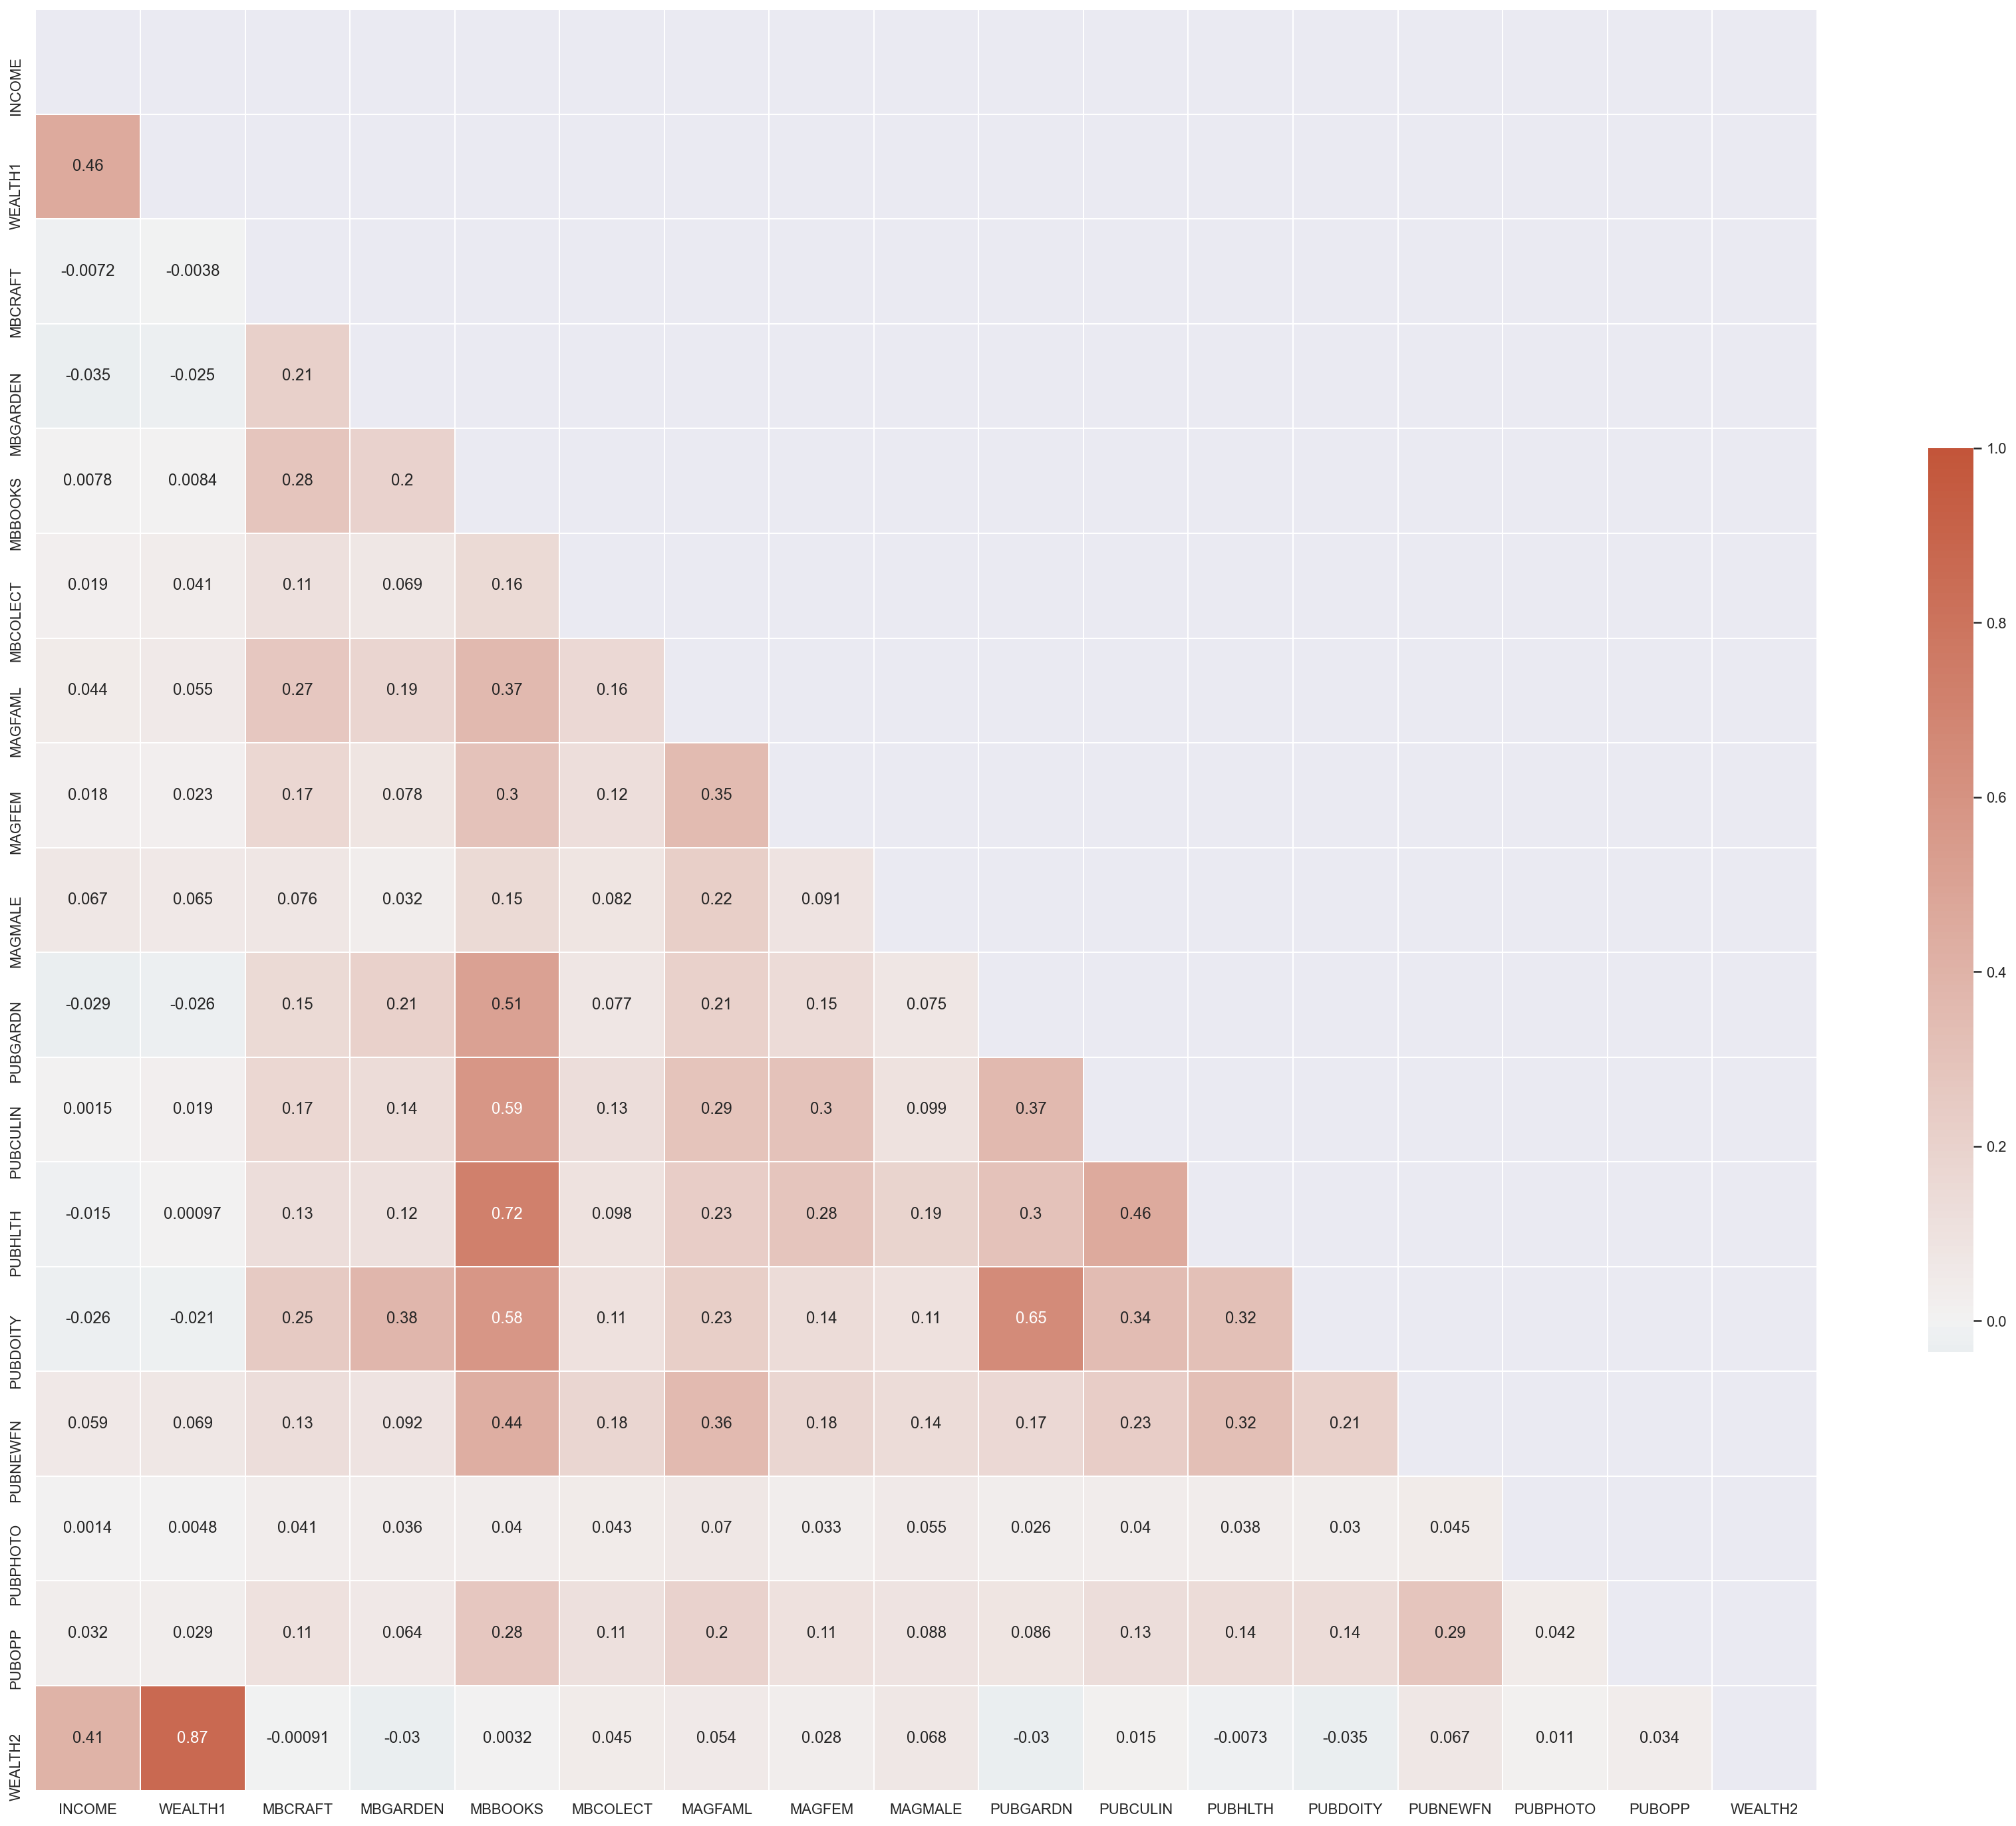

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
corr = prov_data[remaining_missing_2.index].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
corr2 = prov_data.corr()

In [72]:
print(corr2["WEALTH1"].abs().sum())
print(corr2["WEALTH2"].abs().sum())

66.13627219438473
58.95450082267199


In [73]:
#Drop wealth1 since it's the most correlated with other variables
prov_data.drop(columns='WEALTH1', inplace=True)

In [74]:
prov_data['AGE'] = (2020-pd.DatetimeIndex(prov_data['DOB']).year)

In [75]:
prov_data.drop(columns = 'DOB', inplace=True)

In [76]:
remaining_missing_3 = prov_data.isnull().sum()[prov_data.isnull().sum()>0]

In [77]:
prov_data[remaining_missing_3.index].dtypes

INCOME      float64
MBCRAFT     float64
MBGARDEN    float64
MBBOOKS     float64
MBCOLECT    float64
MAGFAML     float64
MAGFEM      float64
MAGMALE     float64
PUBGARDN    float64
PUBCULIN    float64
PUBHLTH     float64
PUBDOITY    float64
PUBNEWFN    float64
PUBPHOTO    float64
PUBOPP      float64
DATASRCE     object
WEALTH2     float64
LIFESRC      object
AGE         float64
dtype: object

In [78]:
prov_data[['DATASRCE','LIFESRC']] = prov_data[['DATASRCE','LIFESRC']].astype('float64')

In [79]:
prov_data.dtypes

Unnamed: 0                         int64
ODATEDW                   datetime64[ns]
OSOURCE                           object
TCODE                              int64
STATE                             object
ZIP                                int32
MAILCODE                          object
PVASTATE                          object
NOEXCH                            object
RECINHSE                           int64
RECP3                              int64
RECPGVG                            int64
RECSWEEP                           int64
MDMAUD                            object
DOMAIN                            object
HOMEOWNR                           int64
CHILD03                           object
CHILD07                           object
CHILD12                           object
CHILD18                           object
NUMCHLD                          float64
INCOME                           float64
GENDER                            object
HIT                                int64
MBCRAFT         

In [80]:
metric_features = prov_data.select_dtypes(include = ['float64', 'int64'])
metric_features.columns

Index(['Unnamed: 0', 'TCODE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP',
       'HOMEOWNR', 'NUMCHLD', 'INCOME', 'HIT',
       ...
       'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT', 'CONTROLN',
       'HPHONE_D', 'RFA_2F', 'LIFETIME_OF_DONOR_DATA', 'AGE'],
      dtype='object', length=357)

In [81]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(prov_data[metric_features.columns])
prov_data[metric_features.columns] = scaled_feat
prov_data[metric_features.columns]

,Unnamed: 0,TCODE,RECINHSE,RECP3,RECPGVG,RECSWEEP,HOMEOWNR,NUMCHLD,INCOME,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,LIFETIME_OF_DONOR_DATA,AGE
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.0,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.000000,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.000000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.1

In [ ]:
from sklearn.impute import KNNImputer
data_neighbors = prov_data.copy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_neighbors[metric_features.columns] = imputer.fit_transform(data_neighbors[metric_features.columns])